<a href="https://colab.research.google.com/github/BlueDespero/CloverSolver/blob/issues%2Fissue_17/CloverSolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sformułowanie problemu pełnego pokrycia zbioru

Dany jest zbiór $S\subseteq 2^X$. Znaleźć takie $S^*\subseteq S$, że 
$\bigcup_{s\in S^*}s=X \land\bigcap_{s\in S^*}s=\emptyset$


# Benchmarki

Problem pełnego pokrycia najczęściej nie występuje zadany wprost, jednak wiele zagadnień można do niego sprowadzić używając odpowiedniej metody transkrypcji wymagań i możliwości na pewien szczególny zbiór $S$.

## Sudoku

**Opis:** Jest to łamigłówka, której celem jest wypełnienie diagramu 9 × 9 w taki sposób, aby w każdym wierszu, w każdej kolumnie i w każdym z dziewięciu pogrubionych kwadratów 3 × 3 (zwanych „blokami” lub „podkwadratami”) znalazło się po jednej cyfrze od 1 do 9. Sudoku ma **tylko jedno** rozwiązanie.

**Metoda transkrypcji:** 
$X$ jest zbiorem wymagań:


*   dla każdego pola (x,y): do $X$ wpisujemy wymaganie "w wierszu x i kolumnie y ma stać jakaś liczba"
*   dla każdego wiersza i każdej liczby (x,z): do $X$ wpisujemy wymaganie "wiersz x ma zawierać liczbę z"
*   dla każdej kolumny i każdej liczby (y,z): do $X$ wpisujemy wymaganie "kolumna y ma zawierać liczbę z"
*   dla każdego boksu i każdej liczby (Box#i,z): do $X$ wpisujemy wymaganie "Box #i ma zawierać liczbę z"

Następnie tworzymy zbiór $S$. Robimy to dwu etapowo. Najpierw tworzymy dwa zbiory:

*   $P$ będzie zbiorem liczb, które są już wpisane w sudoku w notacji (współrzędna_x, współrzędna_y, liczba): $\{(x,y,z)|x,y,z\in\{1,...,9\}\land\text{W ustawieniu początkowym w wierszu x i kolumnie y stoi liczba z}\}$
*   $R=\{(x,y,z)|x,y,z\in\{1,...,9\}\land(\exists_{z^*\in\{1,...,9\}}(x,y,z)\in P\implies z^*=z)  \}$

$S=\{\{\text{spełniane wymagania przez (x,y,z)}\}|(x,y,z)\in R\}$

Zbiory $S$ oraz $X$ można łatwo reprezentować jako macierz zer i jedynek:

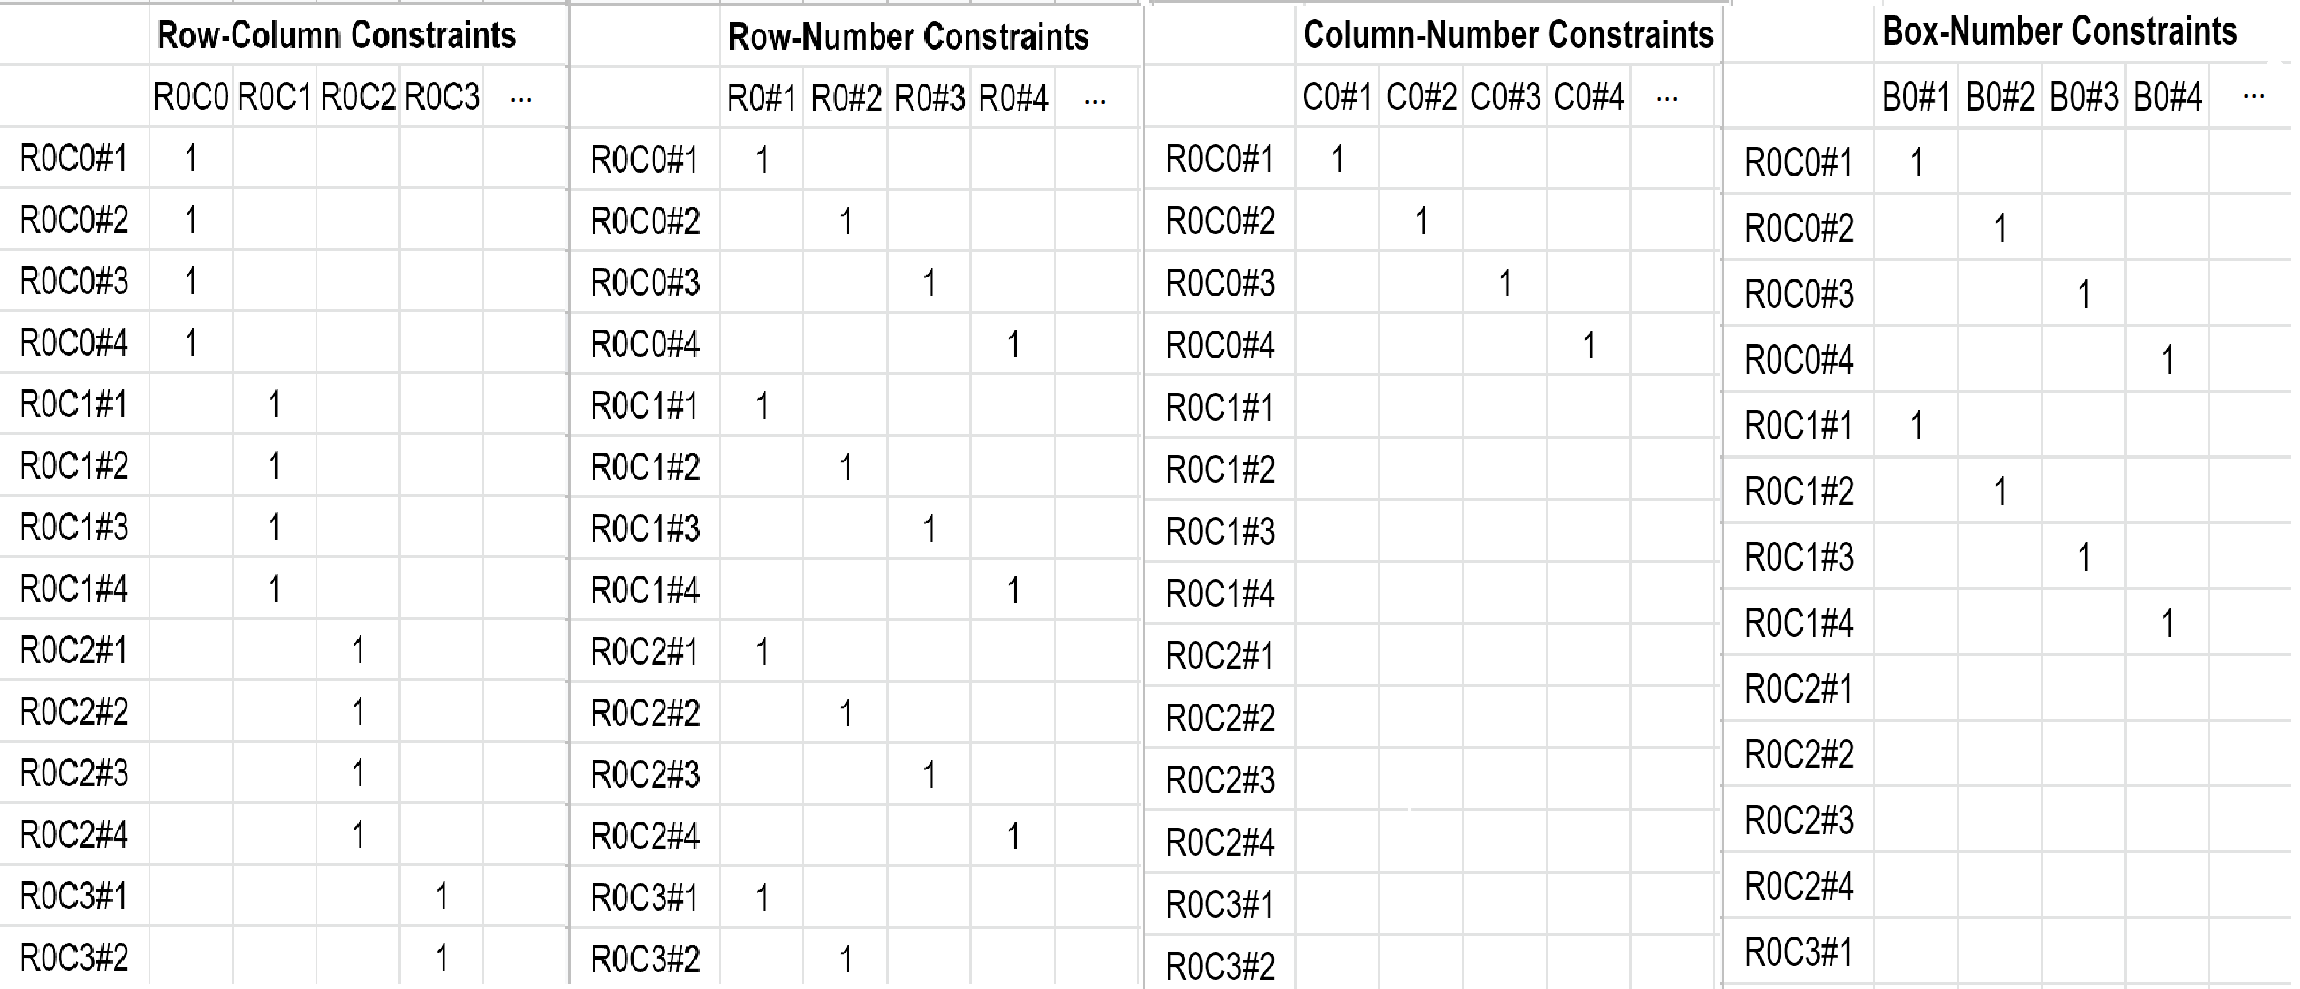


Wiersze odpowiadają zbiorom należącym do $S$. Kolumny sklejonych z sobą czterech tabelek odpowiadają wymaganiom z $X$. Puste pola to zera. Na takiej macierzy łatwo jest określić problem pełnego pokrycia. Szukamy takiego zbioru wierszy, że suma mnogościowa elementów na odpowiadających sobie pozycjach wierszy jest wierszem samych jedynek, a ich iloczyn mnogościowy jest wierszem samych jedynek. Taką macierz będziemy nazywać macierzą transkrypcji.

# Znane algorytmy rozwiązujące problem pełnego pokrycia

## Algorytm X

**Idea działania:** Algorytm rekurencyjnie przeszukuje wszystkie dopuszczalne podzbiory $S$. Zwraca wszystkie zbiory $S^*$, które są rozwiązaniem lub informację o tym, że rozwiązania nie ma. W najgorszym przypadku algorytm sprawdza wszystkie kombinacje.

**Analiza:** TODO

# Nasze pomysły na rozwiązanie

## Funkcja celu

Określenie funkcji celu nie jest trywialne. Intuicja podpowiada, że należy skorzystać z całej wiedzy jaką mamy o osobniku, aby poddać go ocenie. Dlatego uzależniamy ją od dwóch parametrów:


1.   Stopnia poradzenia sobie z problemem - ile liczb udało się wpisać
2.   Stopień niedopuszczalności - ile warunków zostało złamane

Najczęściej stosujemy zależność liniową czyli: $2. - 1. + \text{liczba ograniczeń}$. W ten sposób wiemy, że zawsze, nie zależnie od wymiaru sudoku, minimum funkcji celu to zero.

Testowaliśmy również inne zależności:
- kwadratową

Pomysł:
- parametryzowane



## Random sampling

In [ ]:
# Przedstawienie efektywności algorytmu - analiza jednego wykonania

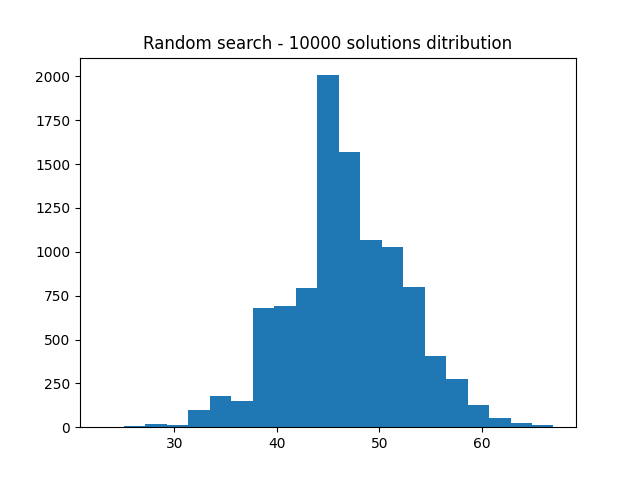

In [ ]:
# Przedstawienie efektywności algorytmu - analiza wielu wykonań

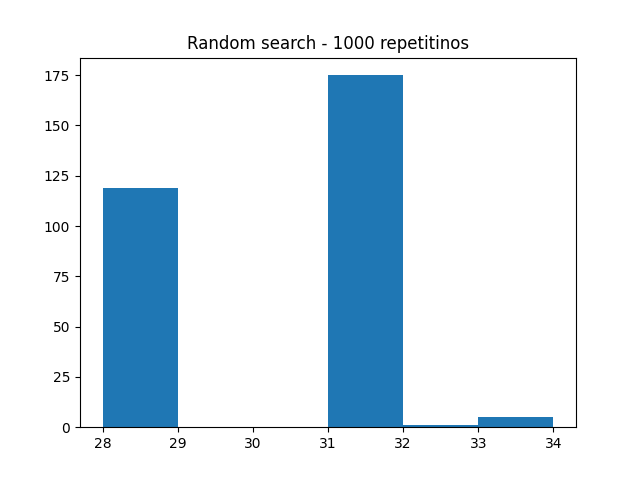

## Simulated annealing

In [ ]:
# Przedstawienie efektywności algorytmu - analiza wielu wykonań

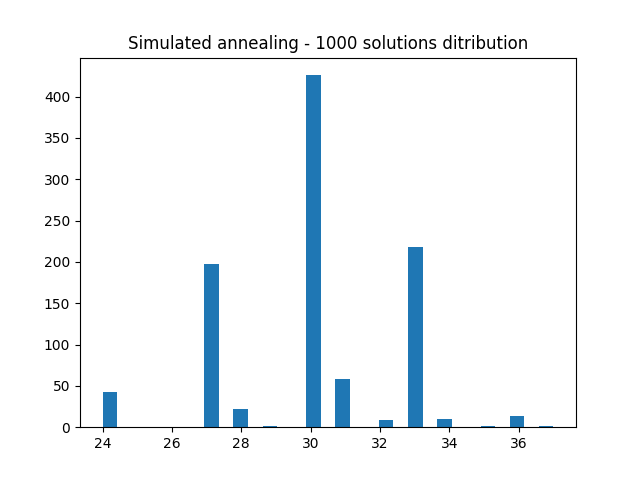

## SGA

## Progressive evolutionary algorithm - pierwsze podejście quasi genetyczne

**Opis działania:**
populacja początkowa zaczyna z tylko jedną ustawioną liczbą, wobec czego każdy osobnik jest dopuszczalny. Następnie w pętli, aż do osiągnięcia pełnego sudoku lub limitu iteracji wykonuje dwie operacje:

- Jeśli aktualny osobnik jest dopuszczalny, dokłada nową losowo wybraną liczbę w losowo wybranym polu.

- W przeciwnym przypadku ostatnia liczba została dołożona źle. Algorytm dokonuje mutacji osobnika polegającej na usunięciu złego elementu i dołożeniu jakiegoś innego.

In [ ]:
# Przedstawienie efektywności algorytmu - analiza jednego wykonania

Sudoku $4\times 4$ znalezione rozwiązanie

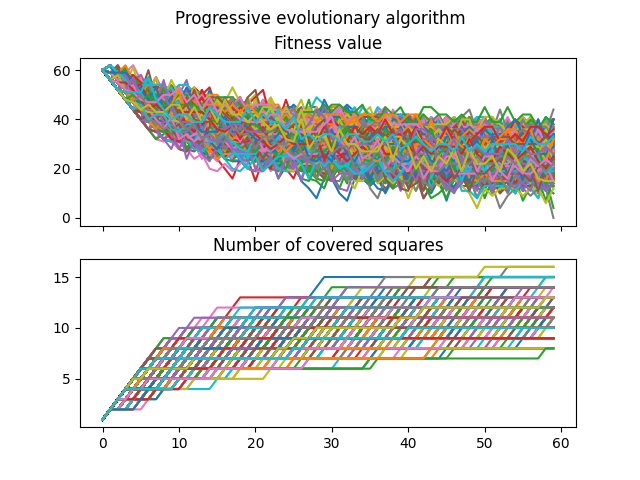

Sudoku $4\times 4$ nie znalezione rozwiązanie

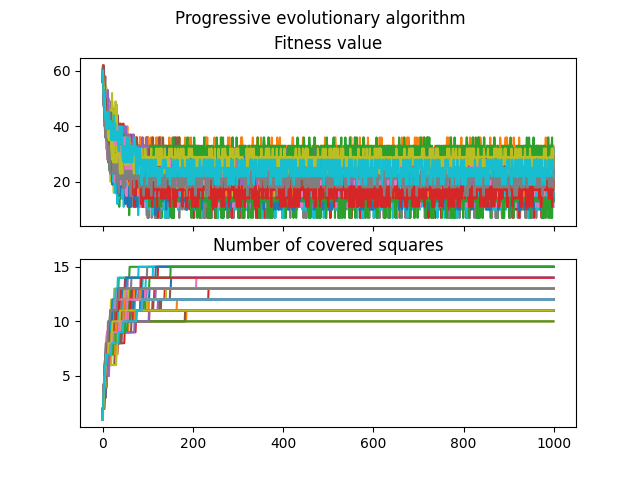

In [ ]:
# Przedstawienie efektywności algorytmu - analiza wielu wykonań

**Analiza:** skuteczność algorytmu zależy od tego czy pewnemu osobnikowi uda się losować tylko liczby, które ostatecznie powinny znaleźć się na danych polach oraz od tego czy uda się zakończyć proces wypełniania nim upłynie dostępna liczba iteracji. Innymi słowy, pierwszy warunek oznacza, że pewien osobnik nigdy nie ustawi liczby potencjalnie dobrej (pasującej do poprzednich), ale innej niż docelowa.

>Plusem takiego podejścia jest fakt, że pomimo iż funkcja celu nie wymusza otrzymywania poprawnych osobników, to tylko takie są rozważane.

> Minusem jest to, że wystarczy raz trafić na liczbę pasującą do poprzednich, ale inną niż właściwa, aby dany osobnik "ugrzązł" i jedynie spowalniał algorytm. Przykład takiego osobnika poniżej:

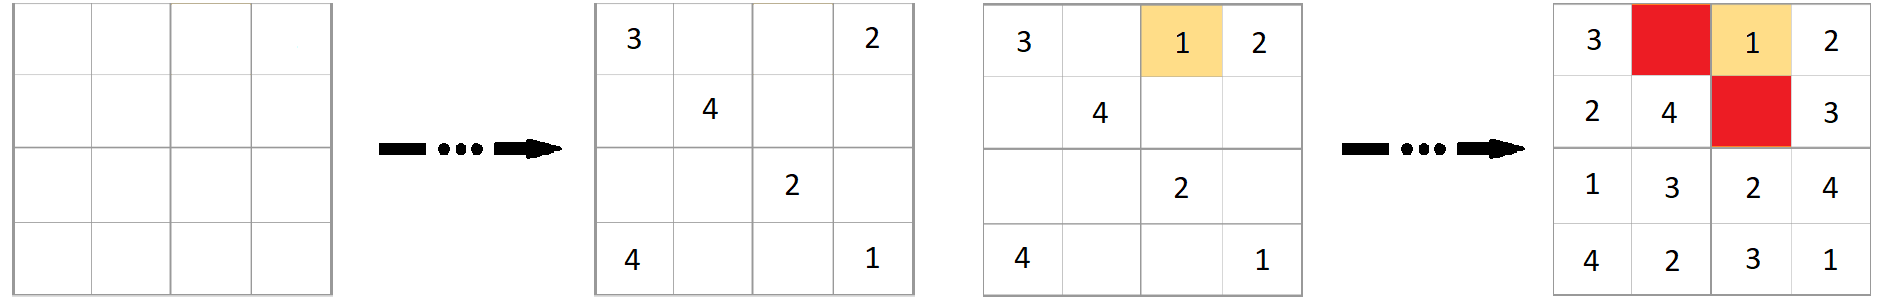

> Algorytm wstawił jedynkę na puste pole (obrazek 3.). Mimo iż nie kłuci się ona z żadną inną liczbą, to sudoku w takiej konfiguracji jest już niewykonalne. Taki rozwój osobnika będzie dalej nazywany złą drogą, dojściem do martwego punktu.

**Uwagi:**
ta wersja algorytmu jest w stanie rozwiązywać najprostrze benchmarki

## Progressive evolutionary algorithm extended

**Opis:** algorytm bazuje na swojej wersji podstawowej. Został jednak rozszeżony o parametr wstecznego horyzontu czasowego oraz o operator pozwalający na radzenie sobie z przypadkiem zejścia osobnika na złą drogę.


*   Wsteczny choryzont czasowy - parametr indywidualny dla każdego osobnika, pamięta informację o tym jak odległa była ostatnia mutacja na poprawnego osobnika 
*   "krzyżowanie" - gdy liczba mutacji na gorszego osobnika osobnika w danym stadium przekroczy oczekiwany czas oczekiwania na sukces półtorej razy, osobnik przejmuje 3/4 chromosomu od wylosowanego innego chromosomu. Dobór drugiego rodzica następuje metodą ruletki.

**Analiza:** metoda zastosowana w tym podejściu rozwiązuje problem dojścia do martwego punktu, dzięki czemu jest o wiele skuteczniejsza niż poprzednia. Wciąż jednak nie jest w stanie poradzić sobie z trudniejszymi sudoku.



> Plusem jest skuteczne wykorzystanie nagromadzonej wiedzy o osobnikach poprzedzających.


> Minusem jest wciąż niesatysfakcjonująca efektywność.

**Uwagi:** to podejście wciąż nie używa żadnej informacji o problemie. Osobniki wciąż działają po omacku, nie zakładając zależności zmiennych.







**Szczegółowa analiza:**

Napotkaliśmy na problem określenia czy osobnik, który pewien czas błądzi wokół jakiegoś rozwiązania doszedł do minimum lokalnego, czy po prostu wciąż losuje osobniki niedopuszczalne. Zakładamy, że chcielibyśmy mieć 90% prawdopodobieństwo, że jeśli nasz algorytm zdecyduje się na operację krzyżowania to będzie to słuszne. Patrząc na to z drugiej strony: liczba iteracji określająca czas, przez który osobnik ma przeszukiwać swoje otoczenie, może wynieść maksymalnie tyle, aby średnia szansa na to, że nie znalazł lepszego rozwiązania, pomimo istnienia takiego, wyniosła wyniosła mniej niż 10%.

Zauważmy, że prawdopodobieństwo satysfakcjonującej mutacji zależne jest od kilku czynników. Po pierwsze od rozmiaru planszy do sudoku. Oznaczmy ją przez $n$, standardowo jest równa 9. Dalej od aktualnego stadium, czyli liczby już ułożonych liczb - oznaczmy przez $k\in\{1,2,...,n^2\}$. Ostatecznie również od liczby liczb początkowych - oznaczmy przez $l$.

Ze znalezionych danych statystycznych dla sudoku $9$x$9$ liczbę $l$ można szacować w zależności od poziomu trudności:
- 35-45 łatwe
- ~25 trudne
- 17 najtrudniejsze (zarazem najmniejsza liczba jaką można uzyskać)
Dla ułatwienia dalszych obliczeń załóżmy, że $l=30$ oraz załóżmy, że proporcjonalność liczby pól początkowych do pól w ogóle jest stała. Zatem w ogólności:
$$\frac{l}{n^2}\approx\frac{30}{81}\approx\frac{3}{8}\implies l\approx\frac{3}{8}n^2$$

Niech $X_{n,k}$ oznacza zmienną losową odpowiadającą czasowi przeszukiwania lokalnego aż do znalezienia lepszego osobnika dla sudoku o wymiarach $n\times n$ i po wpisaniu $k-1$ liczb. $X_k\sim \text{G}(p)$. Aby oszacować czas $t$ potrzebny na uzyskanie $90\%$ pewności, że jeśli istnieje lokalnie lepszy osobnik, to uda się go znaleźć można wyznaczyć rozwiązując nierówność:
$$\sum_{i=1}^t P(X_{n,k}=i)\geq 90\%$$
$$t\geq\frac{1}{log_{10}(\frac{1}{1-p})}$$

Problemem pozostaje wyznaczenie $p$. Jest ono pewną funkcją $n$ i $k$, której wyznaczenie wprost okazało się zbyt skomplikowane. Rozwiązaniem okazała się metoda polegająca na zbadaniu na wielu przykładach rozkładu zmiennej $X_{n,k}$. Aproksymacja w ten sposób rozkładu okazała się być bardzo dobra - szybko się stabilizuje.

In [ ]:
# Statystyczne wyznaczenie rozkładu

In [ ]:
# Przedstawienie efektywności algorytmu - analiza jednego wykonania

Sudoku $4\times 4$



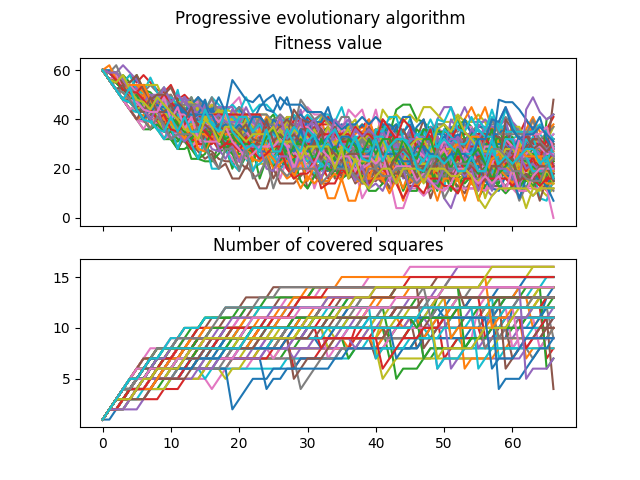

Sudoku $9\times 9$


In [ ]:
# Przedstawienie efektywności algorytmu - analiza wielu wykonań

Rozkład prawdopodobieństwa sukcesu w zależności od tego, którą liczbę skolei wpisujemy.

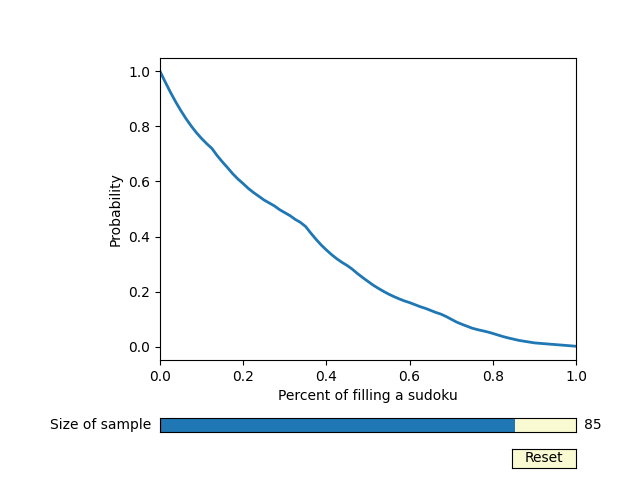

Pomysły na dalszy rozwój:


*   Rozszerzenie do PEA/EPEA o osobniki trochę niedopuszczalne. Jest tylko jedna droga ewolucyjna, która prowadzi od napisania pierwszej liczby do ułożenia całego sudoku tak, że każdą cyfrę po drodze wpisujemy dobrze. Jest natomiast wiele dróg dojścia do sukcesu jeżeli algorytm będzie mógł czasem zejść z właściwej ścieżki.

*   Zupełnie inne podejście. Skorzystać z wiedzy o tym jak wygląda macierz transkrypcji i losować osobników jedynie spośród osobników dopuszczalnych - problem z operatorami krzyżowania

*   Stworzyć algorytm pozwalający badać populację pod kątem tego jak rozległą część przestrzeni poszukiwań ona obejmuje -> metoda porównywania algorytmów

*   Dopisać więcej benchmarków niż tylko sudoku

*   Zastosować strategię rozwiązywania problemu np. w 80%, a resztę zostawić algorytmowi deterministycznemu -> powinno rozwiązać problem powolnego przeszukiwania minimów lokalnych